# 1. Unary gradient descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.linspace(-6,4,100)
y = X**2 + 2*X +5

In [3]:
x = 3
alpha = 0.2
iteration = 10

In [4]:
log = []
for i in range(iteration):
    log.append(x)
    x -= alpha * (2*x + 2)

[3, 1.4, 0.43999999999999995, -0.136, -0.48160000000000003, -0.68896, -0.813376, -0.8880256, -0.93281536, -0.959689216]


Text(0.5, 1.0, 'Gradient descent')

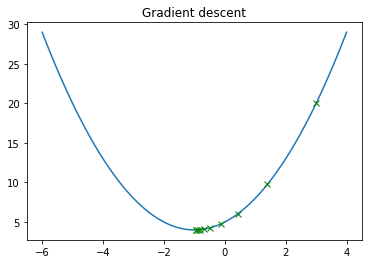

In [5]:
print(log)
log = np.array(log)
log_y = log**2 + 2*log +5
plt.plot(X,y)
plt.plot(log,log_y,'gx')
plt.title('Gradient descent')

# 2. linear regression

In [6]:
def loaddata():
    data = np.loadtxt('./data1.txt',delimiter=',')
    n = data.shape[1]-1
    X = data[:,0:n]
    y = data[:,-1].reshape(-1,1)
    return X,y

## Feature normalization

In [7]:
def featureNormalization(X):
    avg = np.average(X,axis=0)
    sigma = np.std(X, axis=0,ddof=1)
    #Standard deviation ddof = 1 means that the denominator is (n-1), which is an unbiased estimate
    X = (X-avg)/sigma
    return X, avg, sigma

## Cost function
\begin{align}
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m}(h_\theta(x^i)-y^i)^2
\end{align}

In [8]:
def getCost(X,y,theta):
    m = X.shape[0]
    return np.sum(np.power(np.dot(X,theta)-y,2))/(2*m)

## GD function
\begin{align}
\theta_j = \theta_j + \alpha \frac{1}{m} \sum_{i=1}^{m}(y^i)-h_\theta(x^i))x_j^i \\
\end{align}
###### In which
\begin{align}
h_\theta(x^i) = \theta^Tx\\
(is \; the \; hypothesis \; function)\\
\end{align}


In [9]:
def gradientDescent(X, y, theta, iterations ,alpha):
    c = np.ones(X.shape[0]).transpose()
    X = np.insert(X,0,values=c,axis=1)
    m = X.shape[0]
    n = X.shape[1]
    costs = np.zeros(iterations)
    for num in range(iterations):
        for j in range(n):
            theta[j] = theta[j]+(alpha/m)*(np.sum(y-np.dot(X,theta)*X[:,j].reshape(-1,1)))
        costs[num] = getCost(X,y,theta)
    return theta,costs

In [10]:
X,y = loaddata()
X,avg,sigma = featureNormalization(X)
theta = np.zeros(X.shape[1]+1).reshape(-1,1)
iterations = 400
alpha = 0.01
theta,costs = gradientDescent(X,y,theta,iterations,alpha)

Text(0.5, 1.0, 'regression results')

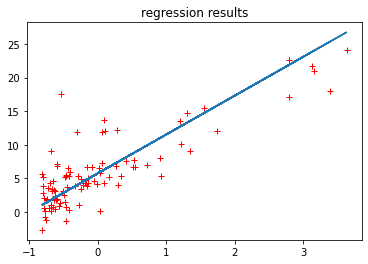

In [11]:
plt.plot(X,y,'r+')
h_theta = theta[0]+theta[1]*X
plt.plot(X,h_theta)
plt.title('regression results')

Text(0.5, 1.0, 'cost')

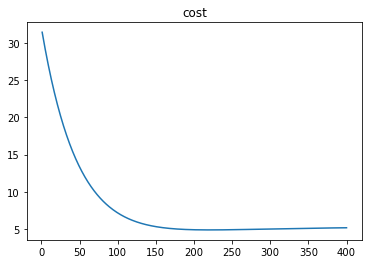

In [12]:
x_axis = np.linspace(1,iterations,iterations)
plt.plot(x_axis,costs[0:iterations])
plt.title('cost')

## Prediction

In [13]:
def predict(X):
    X = (X-avg)/sigma
    c = np.ones(X.shape[0]).transpose()
    X = np.insert(X,0,values=c,axis=1)
    return np.dot(X,theta)